# Libraries

In [1]:
import numpy as np

import pandas as pd
#import geopandas as gpd
#from shapely.geometry import Point

from PIL import Image

import rasterio
from rasterio.plot import show

import matplotlib.pyplot as plt
import matplotlib.colors

%matplotlib inline

## Image loading via PIL (Python Image Library)

In [2]:
data_dir = "data/CarbonStock"
file_name = "CarbonStock_5m.tif"

In [3]:
image_carbon_stock = Image.open(f"{data_dir}/{file_name}")

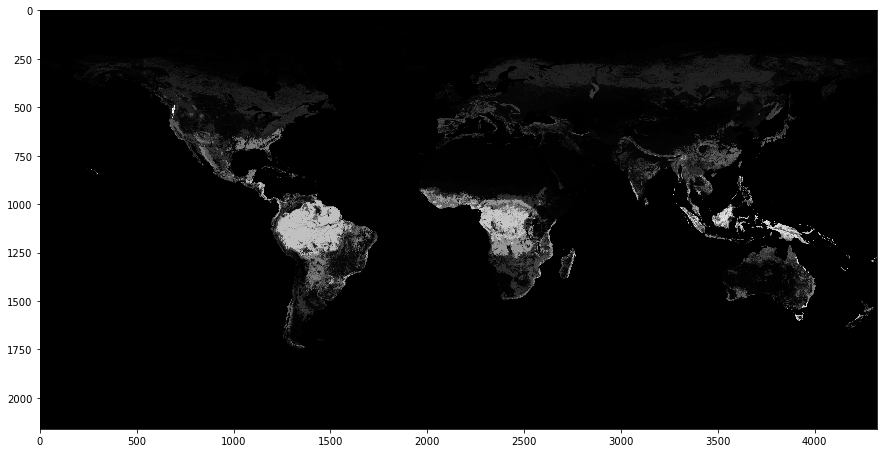

In [4]:
plt.figure(figsize=(15,15))
plt.imshow(image_carbon_stock, cmap = "Greys")

In [5]:
resize_factor = 1/2

image_carbon_stock_resized = image_carbon_stock.resize(
    (int(image_carbon_stock.width * resize_factor),
     int(image_carbon_stock.height * resize_factor))
)

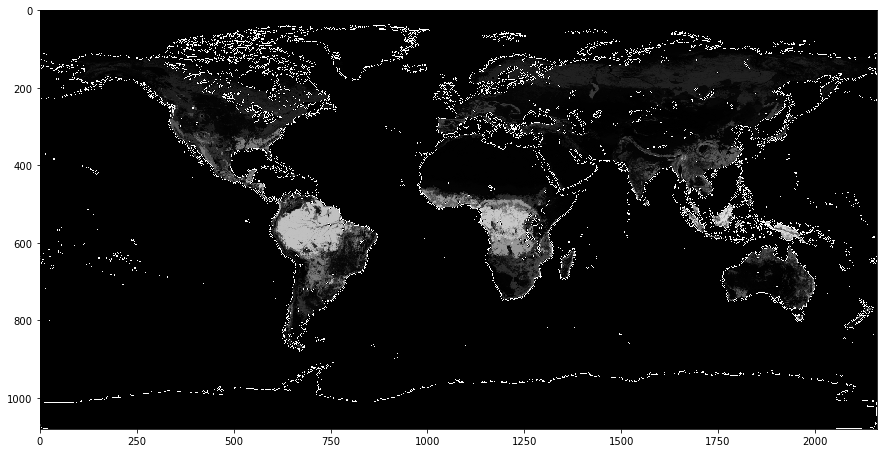

In [6]:
plt.figure(figsize=(15,15))
plt.imshow(image_carbon_stock_resized, cmap = "Greys")

 Problem: unclean resizing, causing artifacts

## Use rasterio to open tif file

In [7]:
carbon_stock_rasterio = rasterio.open(f"{data_dir}/{file_name}")

In [8]:
#carbon_stock_rasterio.bounds

In [9]:
#anchor_coord = carbon_stock_rasterio.transform * (0, 0)
#anchor_coord

In [10]:
carbon_stock_rasterio_image = carbon_stock_rasterio.read(
        out_shape = (
            carbon_stock_rasterio.count,
            int(carbon_stock_rasterio.height* 1),
            int(carbon_stock_rasterio.width * 1)
        )
)

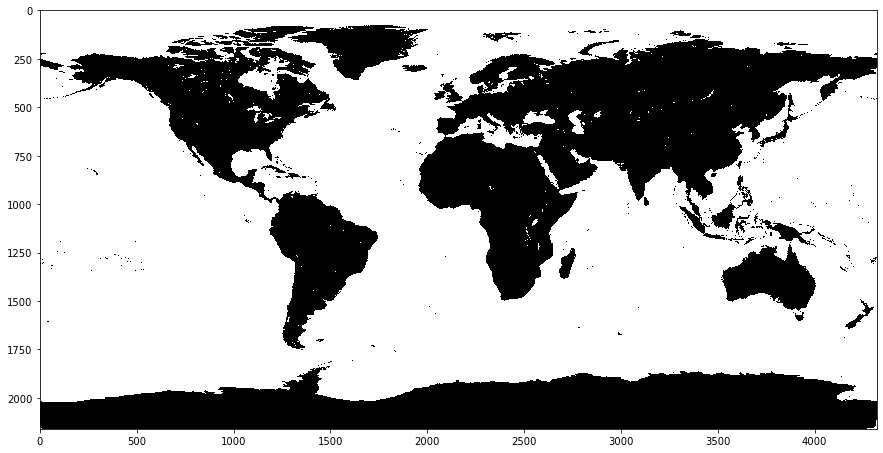

In [11]:
plt.figure(figsize = (15, 15))
show(carbon_stock_rasterio_image, cmap = "Greys")